# Урок 2. ПРОВЕРКА ГИПОТЕЗ

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Описание данных

· ad_id – идентификатор объявления (рекламы)  
· xyz_campaign_id – идентификатор рекламной кампании в базе компании X  
· fb_campaign_id – идентификатор кампании в Facebook  
· age – возрастная группа, которой показывалась реклама  
· gender – пол тех, кому показывалась реклама  
· interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 –       животные, 2 – автомобили, 3 – тортики и т.д.)  
· impressions – число показов  
· clicks – число кликов  
· spent – сумма, которую компания потратила на показ объявления   
· total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы  
· approved_conversion – количество людей, которые купили продукт после просмотра рекламы  

### 1

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 6)}, style='whitegrid')

In [53]:
conv = pd.read_csv('conversion.csv')

In [54]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [55]:
conv.shape

(1143, 11)

In [56]:
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [57]:
conv.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [58]:
conv.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

### 2

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

clicks - дискретная  
age - ранговая/порядковая  
gender - номинативная  
spent - непрерывная   
impressions - дискретная  
approved_conversion - дискретная  
interest - номинативная   
total_conversion - дискретная  

### 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

· Распределение симметричное  
· Полученное распределение является нормальным  
· __Распределение бимодальное__   
· __Полученное распределение не является нормальным__    
· Распределение унимодальное  

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions'>

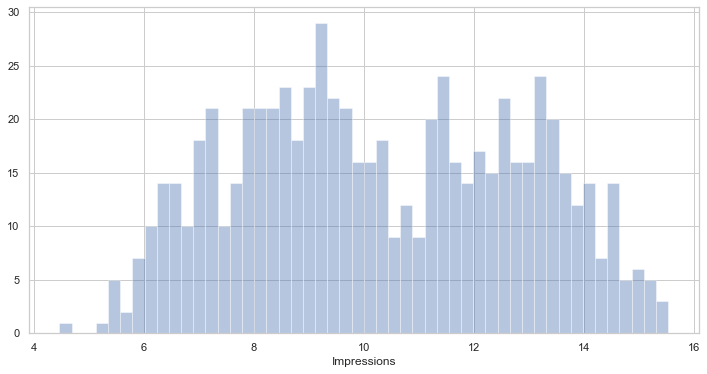

In [59]:
sns.distplot(np.log(conv.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)

### 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

$$CTR = \frac{impressions}{clicks}$$

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [60]:
conv['ctr'] = conv.Clicks / conv.Impressions

In [61]:
conv.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [62]:
conv.iloc[conv.ctr.idxmax()]['ad_id']

738637

### 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

Note: параметр bins=20.

<AxesSubplot:xlabel='ctr'>

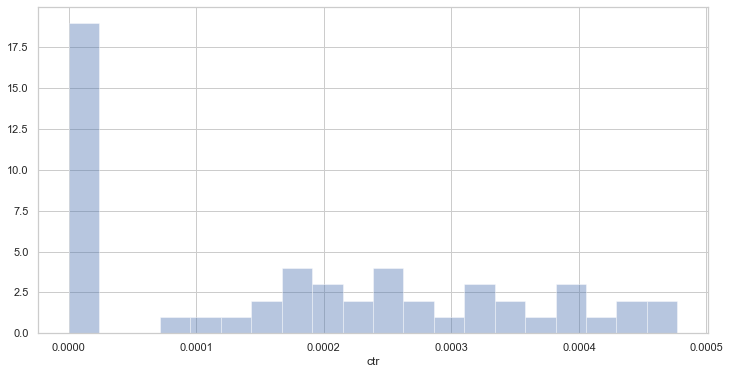

In [63]:
sns.distplot(conv.query('xyz_campaign_id == 916').ctr, kde=False, bins=20)

### 6

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

$$CPC=\frac{clicks}{spent}$$

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [64]:
conv['cpc'] = conv.Spent / conv.Clicks

In [65]:
conv.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

<AxesSubplot:xlabel='cpc'>

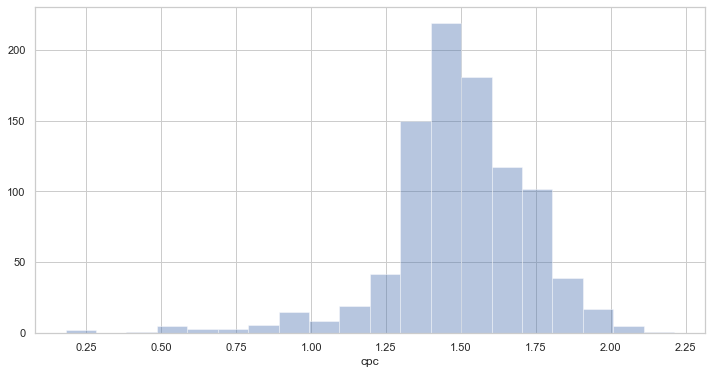

In [66]:
sns.distplot(conv.dropna().cpc, kde=False, bins=20)

In [67]:
round(ss.iqr(conv.cpc, nan_policy='omit'), 2)

0.25

### 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc', ylabel='Density'>

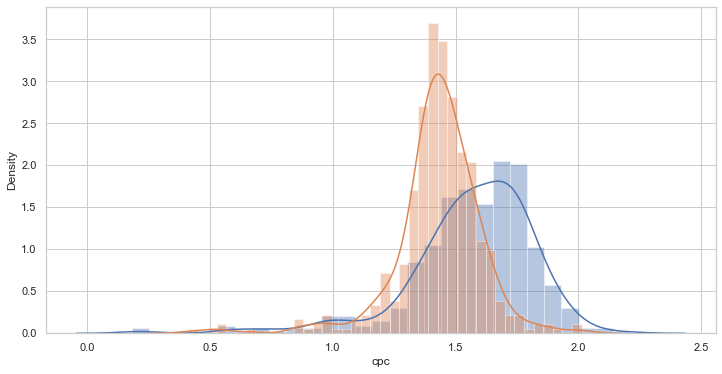

In [68]:
sns.distplot(conv.dropna().query('gender == "M"').cpc)
sns.distplot(conv.dropna().query('gender == "F"').cpc)

### 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [69]:
conv['cr_app'] = (conv.Approved_Conversion / conv.Clicks).mul(100)

In [71]:
round(conv.query('ad_id == 1121814')['cr_app'], 2)

860    3.09
Name: cr_app, dtype: float64